# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [26]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [27]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

In [60]:
y

array([1, 1, 0, ..., 2, 2, 2])

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

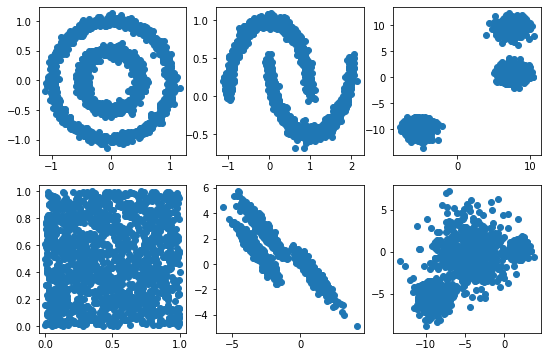

In [109]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))

axes[0, 0].scatter(A[:,0],A[:,1])
axes[0, 1].scatter(B[:,0],B[:,1])
axes[0, 2].scatter(C[:,0],C[:,1])
axes[1, 0].scatter(D[:,0],D[:,1])
axes[1, 1].scatter(E[:,0],E[:,1])
axes[1, 2].scatter(F[:,0],F[:,1])

plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [28]:
from sklearn.cluster import KMeans

In [114]:
AKMeans = KMeans(n_clusters=2, init='k-means++', random_state=0, n_jobs=-1).fit(A)
BKMeans = KMeans(n_clusters=2, init='k-means++', random_state=0, n_jobs=-1).fit(B)
CKMeans = KMeans(n_clusters=3, init='k-means++', random_state=0, n_jobs=-1).fit(C)
DKMeans = KMeans(n_clusters=1, init='k-means++', random_state=0, n_jobs=-1).fit(D)
EKMeans = KMeans(n_clusters=3, init='k-means++', random_state=0, n_jobs=-1).fit(E)
FKMeans = KMeans(n_clusters=3, init='k-means++', random_state=0, n_jobs=-1).fit(F)

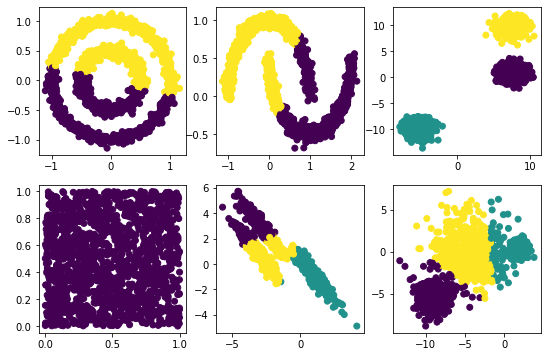

In [115]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=AKMeans.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=BKMeans.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=CKMeans.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=DKMeans.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=EKMeans.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=FKMeans.labels_)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [62]:
from sklearn.cluster import DBSCAN

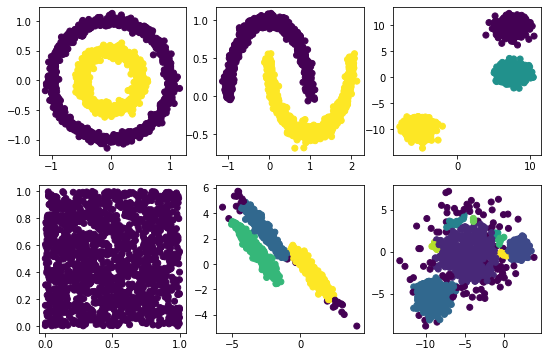

In [116]:
dbA = DBSCAN(eps=0.2, min_samples=3).fit(A)
dbB = DBSCAN(eps=0.2, min_samples=3).fit(B)
dbC = DBSCAN(eps=1.5, min_samples=4).fit(C)
dbD = DBSCAN(eps=0.2, min_samples=3).fit(D)
dbE = DBSCAN(eps=0.3, min_samples=6).fit(E)
dbF = DBSCAN(eps=0.5, min_samples=4).fit(F)

fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=dbA.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=dbB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=dbC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=dbD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=dbE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=dbF.labels_)